# Part 1: Load MNIST data set and format it

In [0]:
# Usaremos la base de datos MNIST
# Esta base de datos contiene imágenes binarias de dígitos escritos a mano.
# Usaremos las imágenes extendidas en forma de vector como datos 'x' y sus
# respectivas etiquetas (enteros) como valores de salida 'y'.

# El objetivo es diseñar redes neuronales que, con ayuda de regularizadores,
# sean capaces de obtener buen desempeño de clasificación multi-clase, tanto
# en los datos de entrenamiento como en los de validación y prueba.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=10ae2f25f3fef5ae5b65084edbfb0f878fa75da9701ef730527aecda045a7712
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [4]:
# Load data set
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Shapes
x_train: (60000, 28, 28)
x_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)
time: 1.71 s


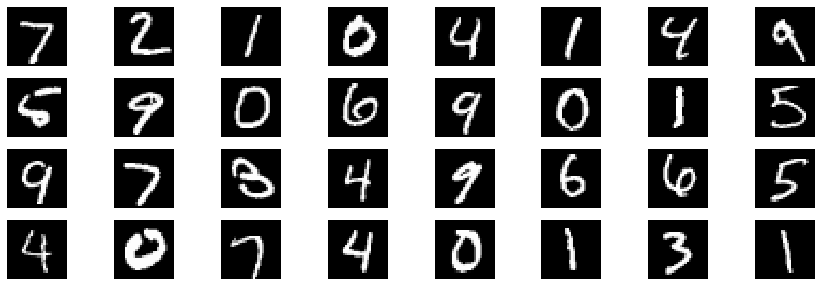

time: 686 ms


In [5]:
# Visualize a few examples
plt.figure(figsize=(15, 5))
for ind in range(32):
    plt.subplot(4, 8, ind+1)
    plt.imshow(x_test[ind], cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
# Put images into a vector format
x_train = np.reshape(x_train, (len(x_train), -1)).astype('float32') # tf requires float32 or float64
x_test  = np.reshape(x_test,  (len(x_test),  -1)).astype('float32')

print("X shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

X shapes
x_train: (60000, 784)
x_test: (10000, 784)
time: 64.8 ms


In [7]:
# Put categorical data into one-hot encoding format
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Y shapes")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Y shapes
y_train: (60000, 10)
y_test: (10000, 10)
time: 8.07 ms


# Part 2: Create DNN model and train it

In [8]:
# tensorflow imports
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout
from keras.regularizers import l1, l2

time: 2.07 ms


In [0]:
# == - ==
# La celda siguiente contiene dos modelos de redes neuronales. Comenta uno y usa otro.
# Evalua uno a la vez y reporta tus resultados.
#
# Nota que importamos layers tipo BatchNorm y Dropout, los cuales son usados en 
# distintas secciones del modelo.
# También importamos regularizadores l1 y l2, los cuales son usados como parametros
# de las capas.
#
# Nota también el uso del parametro "metrics" en la compilación del modelo.
# Este parámetro es sólo informativo, pero no se usa para optimizar el modelo.
# En el caso particular de este modelo, se indica la exactitud de la clasificación,
# sin embargo la minimización del error se hace con la función de pérdida "categorical_crossentropy"
# Puedes revisar más detalles en la documentación de Keras o tf.
#
# Q1: Según los resultados que hayas obtenido, ¿cuál de los dos modelos es preferible y por qué?

#Es mejor el modelo con regularizador porque agiliza el proceso de optimización.

# Q2: ¿Por qué usamos softmax en la salida de la red?

#Porque se está haciendo clasificación multi-clase.

# Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de "entrenamiento"
#     menor o igual a 0.08 y exactitud mayor o igual a 98%.
#     Reporta el número de capas y sus tamaños.

#40,50,15.

# Q4: Ahora usa esos mismos valores de hiperparámetros (número de capas y sus tamaños)
#     en el segundo modelo, y ajusta la taza de dropout, y las alfas en los regularizadores l1 y l2
#     para disminuir el error de generalización (validación).
#     Reporta el modelo regularizado que te haya dado mejores resultados.

#(dropout = 0.20),40,50,15 (l1 = 70e-15)

# Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica
#     el número de sus capas y tamaños para disminuir aún más los errores, tanto
#     el de entrenamiento como el de validación.
#     Reporta tu mejor modelo.

##(dropout = 0.20),40,50,15 (l1 = 70e-15)

# =======

In [41]:
# Create a Deep Network
DNN = Sequential()

# -- Try 01 --
#DNN.add(InputLayer(input_shape=x_train.shape[1:]))
#DNN.add(Dense(4, activation='relu'))
#DNN.add(Dense(2, activation='relu'))
#DNN.add(Dense(1, activation='relu'))
# -- ------ --

# -- Try 01 --
#DNN.add(InputLayer(input_shape=x_train.shape[1:]))
#DNN.add(Dense(40, activation='relu'))
#DNN.add(Dense(50, activation='relu'))
#DNN.add(Dense(15, activation='relu'))
# -- ------ --

# -- Try 02 --
#DNN.add(InputLayer(input_shape=x_train.shape[1:]))
#DNN.add(Dropout(rate=0.33))
#DNN.add(Dense(4))
#DNN.add(BatchNormalization())
#DNN.add(Activation('relu'))
#DNN.add(Dense(4, activation='relu', activity_regularizer=l1(l=3e-15)))
#DNN.add(Dense(4, activation='relu', activity_regularizer=l2(l=3e-15)))
# -- ------ --

# -- Try 02 --
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dropout(rate=0.20))
DNN.add(Dense(40, activation='relu'))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))
DNN.add(Dense(50, activation='relu'))
DNN.add(Dense(15, activation='relu', activity_regularizer=l1(l=70e-15)))
#DNN.add(Dense(15, activation='relu', activity_regularizer=l2(l=3e-15)))
# -- ------ --

DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_10 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 40)                31400     
_________________________________________________________________
batch_normalization_10 (Batc (None, 40)                160       
_________________________________________________________________
activation_10 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 50)                2050      
_________________________________________________________________
dense_39 (Dense)             (None, 15)                765       
_________________________________________________________________
dense_40 (Dense)             (None, 10)              

In [42]:
## Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más opciones.
from keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.6, decay=0.97, nesterov=True)
sgd = 'adam'
DNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

time: 57.6 ms


In [43]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 7s 131us/step - loss: 0.5068 - acc: 0.8478 - val_loss: 0.1324 - val_acc: 0.9617
Epoch 2/50
54000/54000 [==============================] - 6s 117us/step - loss: 0.2036 - acc: 0.9390 - val_loss: 0.1147 - val_acc: 0.9663
Epoch 3/50
54000/54000 [==============================] - 6s 107us/step - loss: 0.1668 - acc: 0.9485 - val_loss: 0.0917 - val_acc: 0.9725
Epoch 4/50
54000/54000 [==============================] - 6s 118us/step - loss: 0.1460 - acc: 0.9559 - val_loss: 0.0885 - val_acc: 0.9738
Epoch 5/50
54000/54000 [==============================] - 6s 112us/step - loss: 0.1285 - acc: 0.9605 - val_loss: 0.0844 - val_acc: 0.9743
Epoch 6/50
54000/54000 [==============================] - 6s 111us/step - loss: 0.1225 - acc: 0.9624 - val_loss: 0.0799 - val_acc: 0.9762
Epoch 7/50
54000/54000 [==============================] - 6s 108us/step - loss: 0.1111 - acc: 0.9655 - val_loss: 0.0792 - v

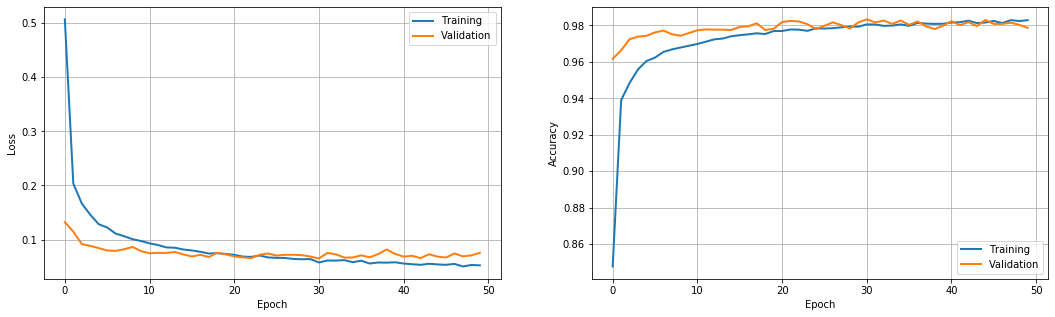

time: 360 ms


In [44]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['acc'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [45]:
# Compute test loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)

Test loss: 0.07996194914911176
Test acc: 0.9752
time: 636 ms


In [46]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
time: 807 ms


In [47]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

time: 2.39 ms


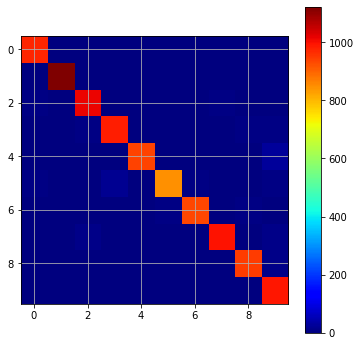

time: 255 ms


In [48]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()